In [17]:
import pandas as pd
url = '/content/drive/MyDrive/CC GENERAL.csv'
data = pd.read_csv(url)

In [18]:
# Data Exploration
print(data.describe())
print(data.info())
print(data.head())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [11]:
from sklearn.cluster import KMeans

# Preprocessing:
data = data.drop('CUST_ID', axis=1)

# Handle missing values (if any)
data = data.fillna(method='ffill')

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [19]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.67580385e+03 9.53344460e-01 2.71978584e+03 1.70857319e+03
  1.01134118e+03 4.58349071e+03 5.33053009e-01 3.33709964e-01
  4.07242760e-01 3.24049064e-01 1.03901734e+01 3.32803468e+01
  1.13969719e+04 6.61627282e+03 2.08454903e+03 1.14437236e-01
  1.17239884e+01]
 [7.97644251e+02 8.50996122e-01 5.23239948e+02 2.57762714e+02
  2.65768285e+02 4.87328993e+02 4.54115400e-01 1.33929692e-01
  3.48230922e-01 1.09032486e-01 2.28872610e+00 9.69394318e+00
  2.27017817e+03 9.19682094e+02 5.16350747e+02 1.48719549e-01
  1.13884224e+01]
 [2.03592595e+03 9.11919171e-01 1.34044256e+03 8.32889608e+02
  5.07928991e+02 1.07577709e+03 5.54287155e-01 3.14024012e-01
  3.83131865e-01 1.42663880e-01 3.43400621e+00 1.94988354e+01
  7.36740542e+03 1.93473470e+03 7.66239733e+02 1.75331243e-01
  1.17321429e+01]
 [3.79095337e+03 9.28977283e-01 9.76931000e+02 1.11830167e+02
  8.65100833e+02 8.83993764e+02 4.57007550e-01 3.86994500e-02
  4.26767700e-01 1.00694400e-01 2.83333333e+00 1.75666667e+01
  4.15833333e+03

In [20]:
# Print the cluster labels
labels=kmeans.labels_
print(labels)

[1 2 2 ... 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

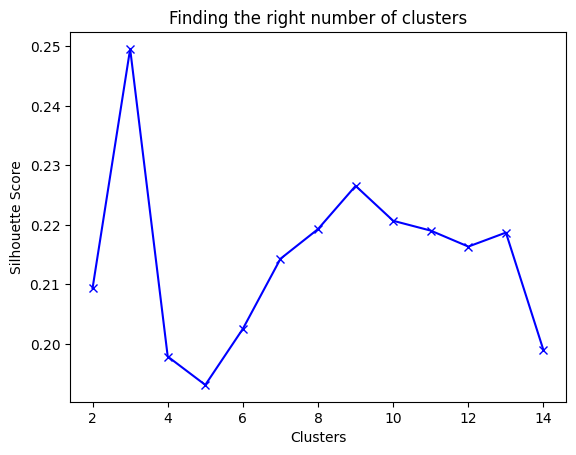

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Preprocessing
data = data.fillna(method='ffill')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Choosing the number of clusters with silhouette score
scores = []
range_values = range(2, 15)

for i in range_values:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(data_scaled)
  scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plotting the results
plt.plot(range_values, scores, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.show()


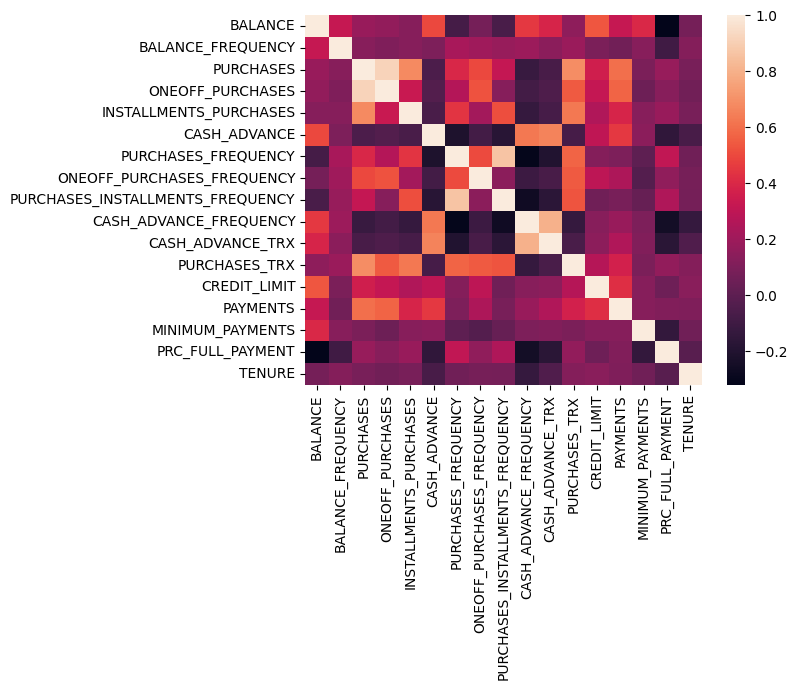

In [27]:
# Exclude 'CUST_ID' column
numerical_data = data.drop('CUST_ID', axis=1)

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Plot the correlation heatmap
sns.heatmap(corr_matrix)
plt.show()


In [29]:
# Print the cluster labels
labels=kmeans.labels_
print(labels)

[1 2 2 ... 1 1 1]
